In [19]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine,euclidean

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 5,5

# Parabola

In [4]:
x = np.linspace(-100,100,100)
a = 0.01
b = -0.5
c = 10
y = a*(x**2) + b*x + c

Text(2, 12, 'RSS=0.01$\\beta_1^2 - 0.5\\beta_1$ + 10')

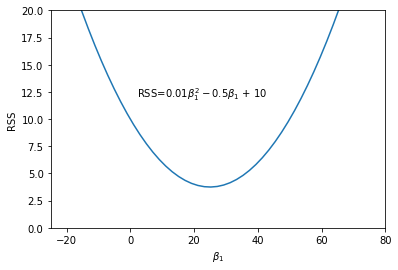

In [5]:
plt.plot(x,y)
plt.xlim(-25,80)
plt.ylim(0,20)
plt.xlabel(r'$\beta_1$')
plt.ylabel('RSS')
plt.text(2,12,r'RSS=0.01$\beta_1^2 - 0.5\beta_1$ + 10')

# Loss function for regression

In [6]:
def regression_margin(y_i, y_hat_i):
    return y_i - y_hat_i

def squared_error(y_i, y_hat_i, delta):
    margin = regression_margin(y_i, y_hat_i)
    return margin**2
def absolute_error(y_i, y_hat_i, delta):
    margin = regression_margin(y_i, y_hat_i)
    return abs(margin)
def huber_error(y_i, y_hat_i, delta):
    margin = regression_margin(y_i, y_hat_i)
    if abs(margin) <= delta:
        return squared_error(y_i, y_hat_i, delta)
    else:
        return 2 * delta * absolute_error(y_i, y_hat_i, delta) - delta**2
def loss_array(y, y_hat, loss_func, delta=0):
    assert len(y) == len(y_hat)
    result = []
    for i in range(len(y)):
        result.append(loss_func(y[i], y_hat[i], delta))
    return np.array(result)

def sort_margin(margin, loss):
    z1 = list(zip(margin, loss))
    z1.sort()
    margin_sort = [z[0] for z in z1]
    loss_sort = [z[1] for z in z1]
    return margin_sort, loss_sort

In [7]:
y = np.random.normal(100,10,500)
y_hat = np.random.normal(100,10,500)

In [8]:
margin = y - y_hat
squared_loss =  loss_array(y, y_hat, squared_error)
absolute_loss = loss_array(y, y_hat, absolute_error)
huber_loss =    loss_array(y, y_hat, huber_error, delta = 10)

margin_squared_loss =sort_margin(margin, squared_loss)
margin_absolute_loss =sort_margin(margin, absolute_loss)
margin_huber_loss =sort_margin(margin, huber_loss)

(0, 40)

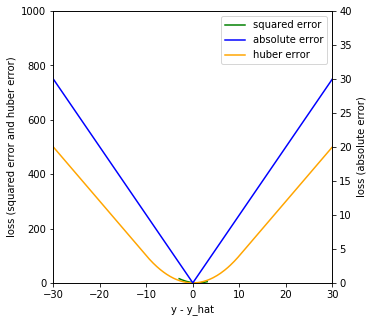

In [20]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ln1 = ax1.plot(margin_squared_loss[0],margin_squared_loss[1], 'g', label="squared error")
ln2 = ax2.plot(margin_absolute_loss[0],margin_absolute_loss[1] , 'b',label="absolute error")
ln3 = ax1.plot(margin_huber_loss[0],margin_huber_loss[1],'orange',label="huber error")

lns = ln1+ln2+ln3
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc=1)

ax1.set_xlabel('y - y_hat')
ax1.set_ylabel('loss (squared error and huber error)')
ax2.set_ylabel('loss (absolute error)')

ax1.set_xlim(-30,30)
ax1.set_ylim(0,1000)
ax2.set_ylim(0,40)